# Proximal Quasi-Static

In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import sys

# Settings
plt.style.use('classic')
sys.path.append('../')

from lib.findiff import *

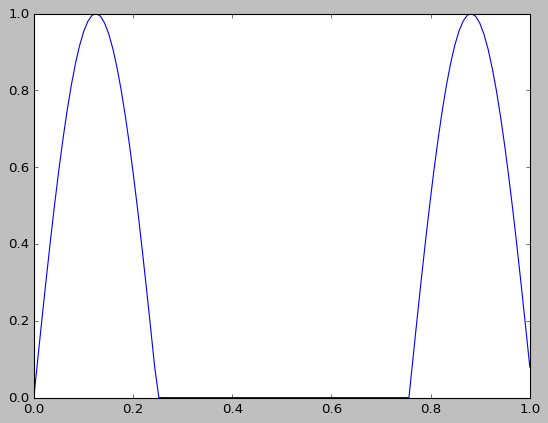

In [2]:
 #GRID
n = 20*6; h=1/(n-1)
x = np.linspace(0,1,n)
#DISTRIBUTIONS
rho= np.zeros(n); rho[:n//4] = np.sin(4*np.pi*x[:n//4])
sigma = np.zeros(n); sigma[3*n//4:] = np.sin(4*np.pi*x[:n//4])
#FUNCTIONS
Gc = np.ones(n)
#OPERATORS
Nabla = D1CD(n, bc = 'Neumann', matrix=True)/h
L = Nabla.T@Nabla
#VARIABLES
mu=100
eta=.01
plt.plot(x,rho+sigma)

In [3]:
phi=np.ones(n)
d=Nabla@phi
u = Gc-np.abs(Nabla@phi)
b = phi-d
lam = np.zeros(n)

In [4]:
def phi_update(f,mu,g):
    sol = np.linalg.solve(-L,2/mu*f-Nabla@g)

In [5]:
def u_update(u,phi,lam):
    Gphi = Nabla@phi
    uPlus = Gc-np.abs(Gphi)
    GuPlus=Nabla@uPlus
    for i,uPlusi in enumerate(uPlus):
        if uPlusi==0:
            u[i]=0
        else:
            u[i]=lam[i]-(1/uPlusi)*GuPlus[i]
    return u

In [6]:
def shrink(x,gamma):
    return (x/np.linalg.norm(x))*np.maximum(np.abs(x)-gamma,np.zeros_like(x))

In [7]:
def lam_update(lam,x,eta):
    lam = lam + eta*x
    for i,xi in enumerate(x):
        if xi!=0:
            lam[i]=0
    return lam

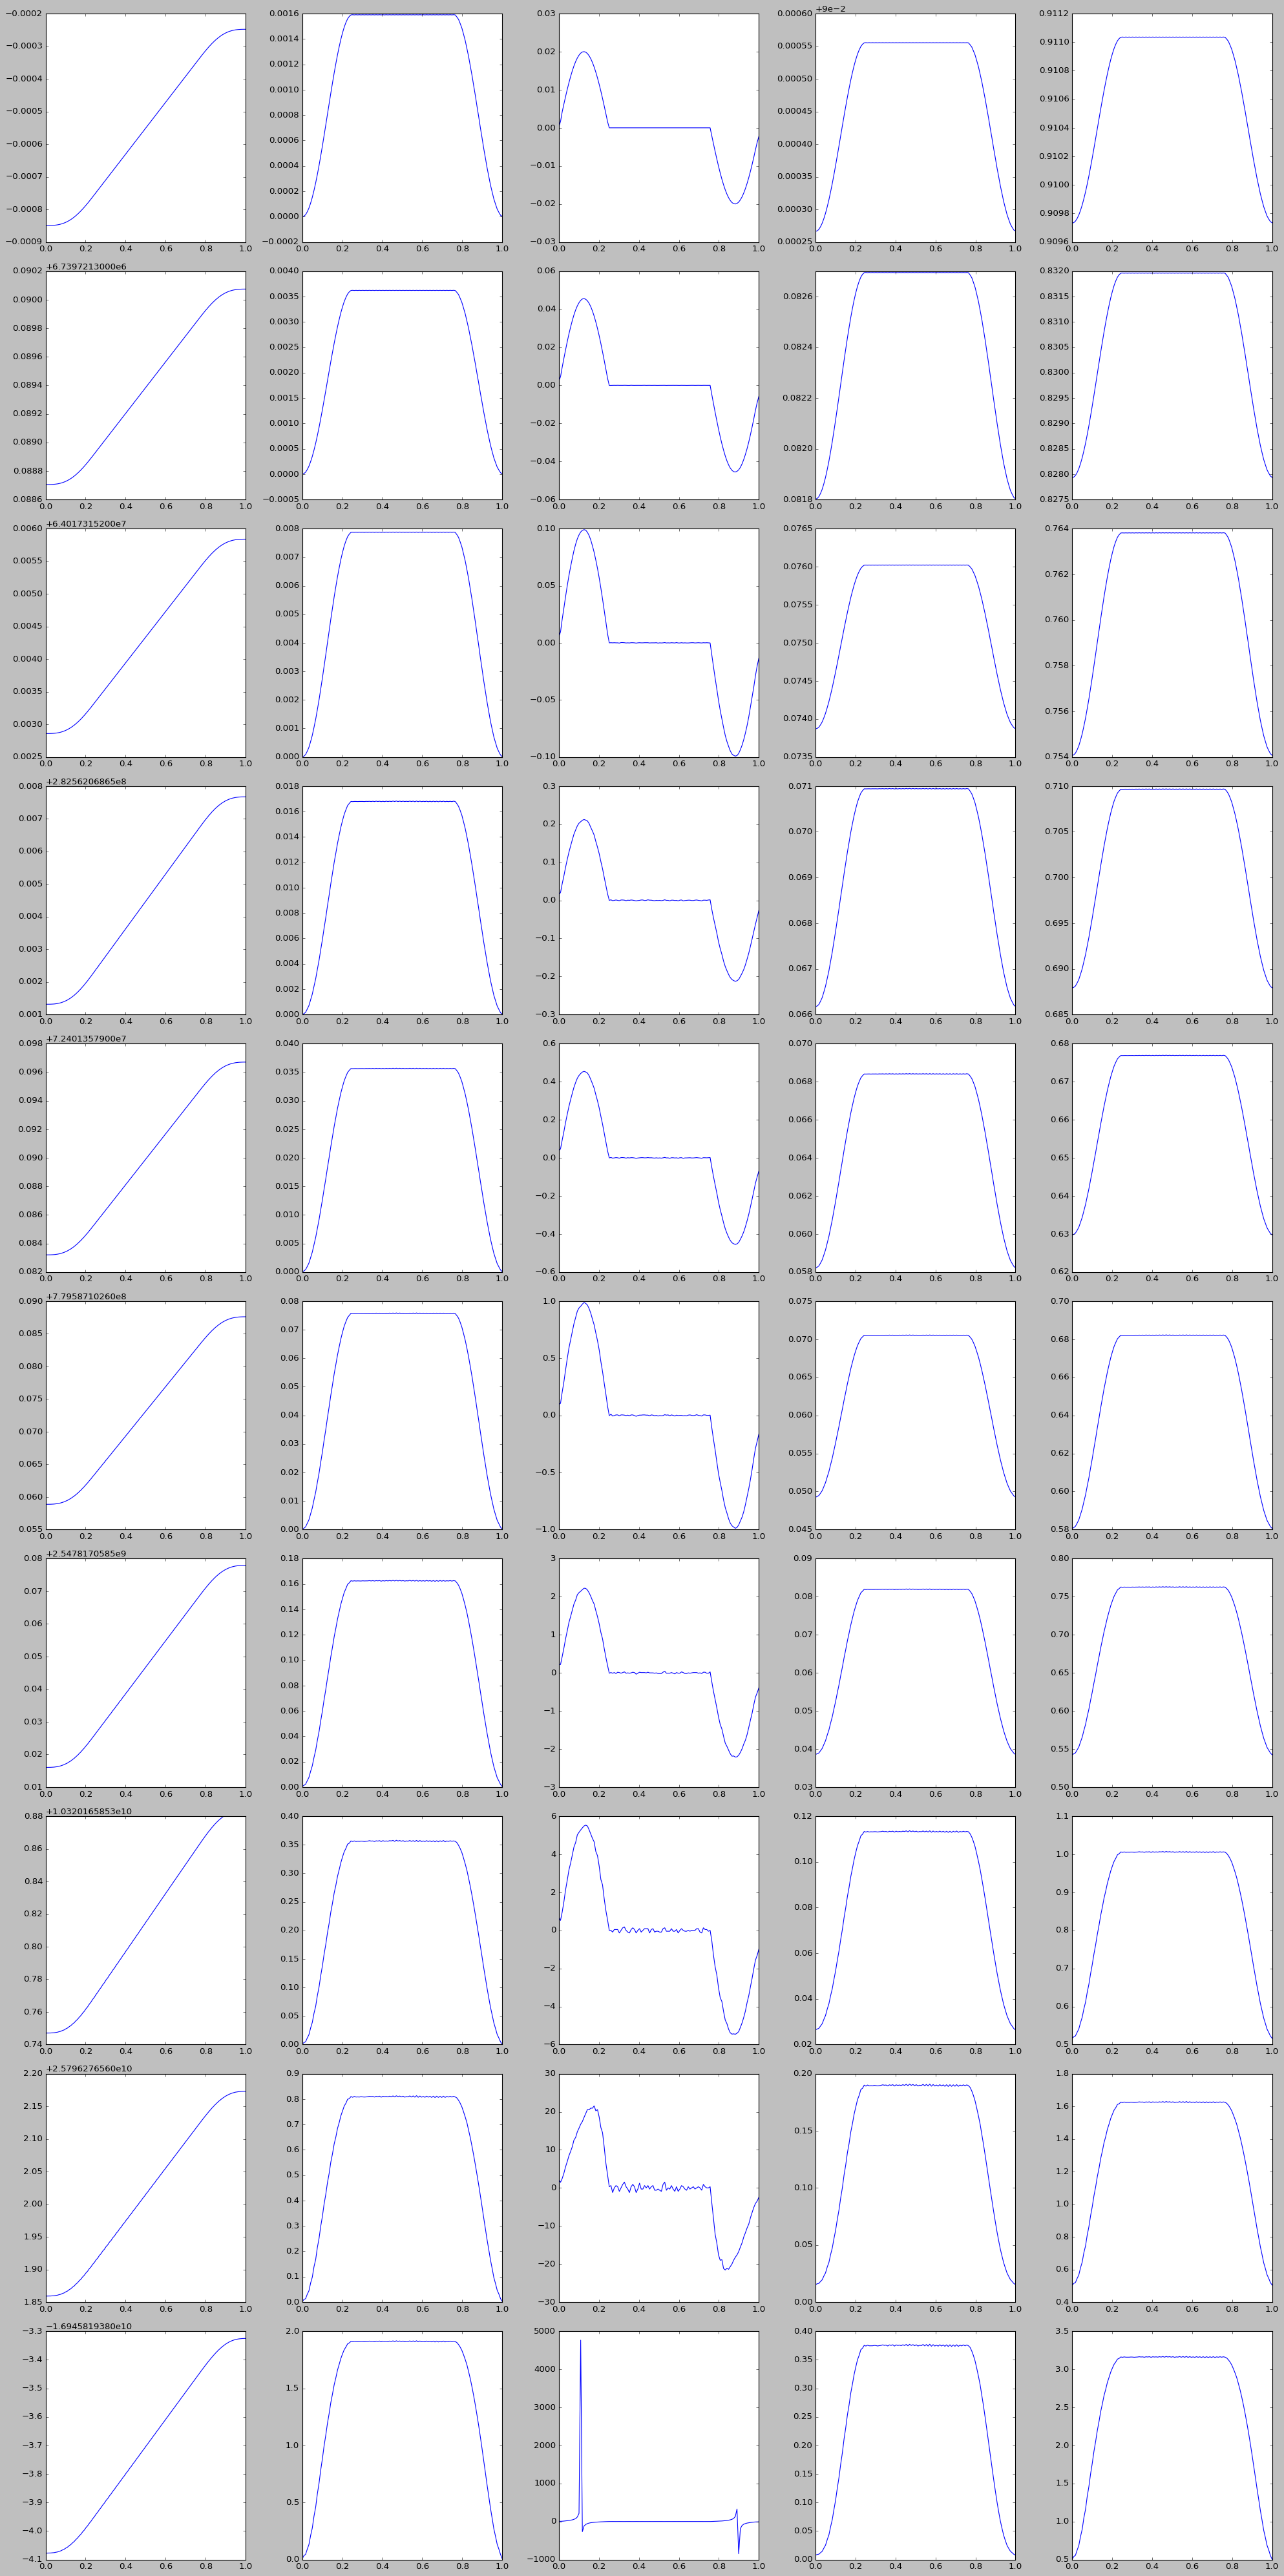

In [8]:
k=10
plt.figure(tight_layout=True,figsize=(5*5,k*5))
for i in range(k):

    phi = np.linalg.solve(-L,(2/mu)*(rho-sigma)-2*Nabla@(d-b))
    u = u_update(u,phi,lam)
    d = shrink(Nabla@phi+b,1/mu)
    lam = lam_update(lam,np.abs(d)+u-Gc,eta)
    b = b + (Nabla@phi-d)
    
    plt.subplot(k,5,5*i+1)
    plt.plot(x,phi)
    plt.subplot(k,5,5*i+2)
    plt.plot(x,Nabla@phi)
    plt.subplot(k,5,5*i+3)
    plt.plot(x,u)
    plt.subplot(k,5,5*i+4)
    plt.plot(x,d)
    plt.subplot(k,5,5*i+5)
    plt.plot(x,b)
    
plt.show()